In [41]:
%matplotlib inline
import pandas as pd
from sklearn import preprocessing as scale
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix, roc_curve, average_precision_score, precision_recall_curve
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score as AUC

In [23]:
#loading csv file into python
dataset = pd.read_csv('C:/Users/kashyap.gaglani/Downloads/device_failure.csv')

In [3]:
dataset.head(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3
5,2015-01-01,S1F01TD5,0,68837488,0,0,41,6,413535,0,0,1
6,2015-01-01,S1F01XDJ,0,227721632,0,0,0,8,402525,0,0,0
7,2015-01-01,S1F023H2,0,141503600,0,0,1,19,494462,16,16,3
8,2015-01-01,S1F02A0J,0,8217840,0,1,0,14,311869,0,0,0
9,2015-01-01,S1F02DZ2,0,116440096,0,323,9,9,407905,0,0,164


In [4]:
dataset.isnull().sum()
data = dataset.dropna(axis=0)

In [5]:
dataset.dtypes

date          object
device        object
failure        int64
attribute1     int64
attribute2     int64
attribute3     int64
attribute4     int64
attribute5     int64
attribute6     int64
attribute7     int64
attribute8     int64
attribute9     int64
dtype: object

In [6]:
data.columns.shape
data['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [7]:
data.columns.shape
data['failure'].value_counts()
#the data is highly imbalanced with failure rate less than 0.09 %

0    124388
1       106
Name: failure, dtype: int64

In [8]:
data.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [9]:
#the installation date does not have much to offer. Its just a daily datetime value for dynamic data
#adding a day row representing age (in days) from inital date of installation 
#assumption that first reading for a device is the installation date
data.sort_values(['device','date'],inplace=True)
data['Days'] = data.groupby('device')['date'].rank(method='dense')
data['date'] = pd.to_datetime(data['date'])

In [43]:
#initial data analysis
data.columns.shape
data['failure'].value_counts()
data.groupby(['attribute7','attribute8'])['attribute7'].count()
#attributes 7 and 8 have same values so one of them can be discarded

attribute7  attribute8
0           0             123036
6           6                 13
8           8                793
16          16               397
22          22                 2
24          24                65
32          32                35
40          40                20
48          48                36
56          56                 6
72          72                11
80          80                 4
96          96                 7
104         104                3
112         112                2
128         128               23
136         136                1
152         152                2
176         176               20
216         216                1
240         240                1
272         272                2
312         312                5
424         424                1
496         496                1
736         736                4
744         744                1
832         832                2
Name: attribute7, dtype: int64

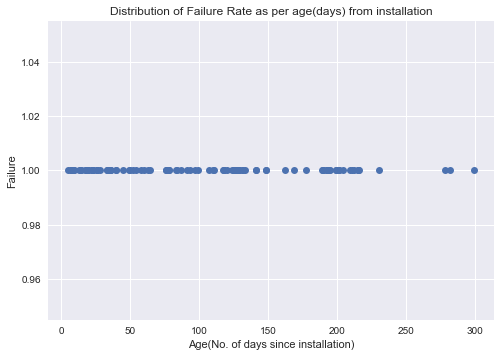

In [10]:
#Failure rate Vs days from installation 
Failure = data[data.failure==1]

#Failure.Days.value_counts().plot(kind='barh')
plt.plot(Failure.Days,Failure.failure,'o')
plt.title("Distribution of Failure Rate as per age(days) from installation")
plt.ylabel("Failure")
plt.xlabel("Age(No. of days since installation)")
#highly unlikely that age has any relation with failure rate

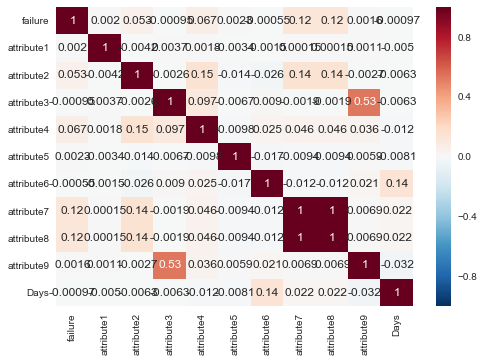

In [11]:
Corr = data[data.columns].corr()
sns.heatmap(Corr,annot=True)
#attrute 9 and 3 seem to have a good co-relation though not high enough


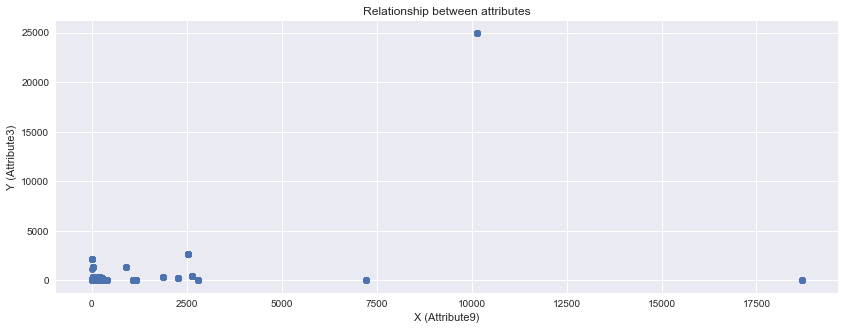

In [12]:
fig = plt.figure(figsize = (14,5))
plt.plot(data.attribute9,data.attribute3,'o')
plt.title("Relationship between attributes")
plt.xlabel('X (Attribute9)')
plt.ylabel('Y (Attribute3)')


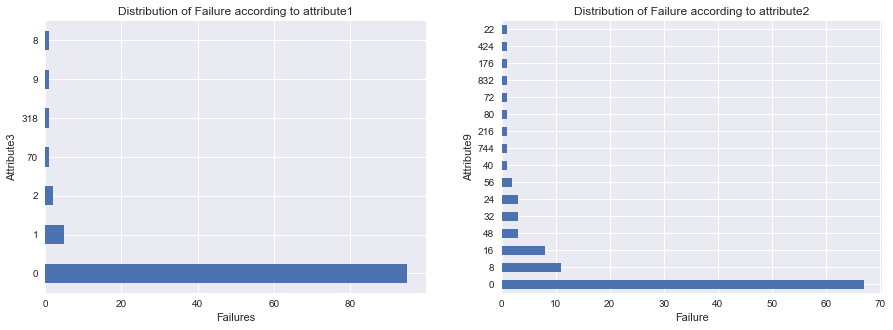

In [13]:
fig = plt.figure(figsize = (15,5))
plt.subplot2grid((1,2),(0,0))
#Failure vs Attribute1
Failure.attribute3.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to attribute1")
plt.xlabel("Failures")
plt.ylabel("Attribute3")

plt.subplot2grid((1,2),(0,1))
Failure.attribute7.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to attribute2")
plt.xlabel("Failure")
plt.ylabel("Attribute9")



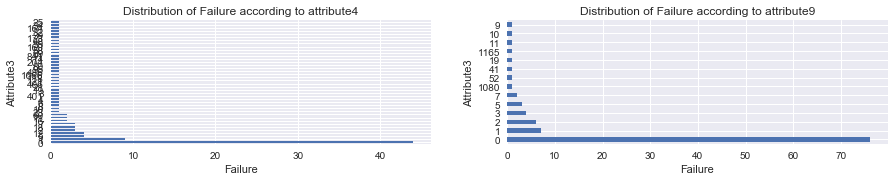

In [14]:
fig = plt.figure(figsize = (15,5))
plt.subplot2grid((2,2),(0,0))
Failure.attribute4.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to attribute4")
plt.xlabel("Failure")
plt.ylabel("Attribute3")

plt.subplot2grid((2,2),(0,1))
Failure.attribute9.value_counts().plot(kind='barh')
plt.title("Distribution of Failure according to attribute9")
plt.xlabel("Failure")
plt.ylabel("Attribute3")

In [15]:
data.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,Days
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524,103.181406
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623,77.212584
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000,38.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000,83.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000,162.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000,304.000000


In [16]:
#since data is highly imbalanced we would be downsampling data.
#resampling data

df_nonfailure = data[data['failure'] == 0]
df_failure = data[data['failure']==1]
df_nonfailure_downsample = resample(df_nonfailure,replace=False,n_samples = 106,\
                                    random_state=23)
df_resampled = pd.concat([df_nonfailure_downsample,df_failure])

data_Outcome = df_resampled['failure']
#scaling cat and cont data

#dropping unwanted columns
df_resampled = df_resampled.drop(['failure','date','device','attribute8'],axis = 1)
standard_sc = scale.StandardScaler()
x_std = standard_sc.fit_transform(df_resampled)
data_scaled = pd.DataFrame(x_std)


In [17]:
data_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-1.402011,-0.224912,-0.156009,-0.138593,-0.426639,-0.682402,-0.184945,-0.110005,-1.279188
1,1.308490,-0.224912,-0.156009,-0.160191,-0.545336,-0.612099,-0.184945,-0.119183,-1.055891
2,1.536308,-0.224912,-0.156009,-0.203389,-0.545336,-2.303108,-0.184945,-0.119183,-0.464810
3,-0.115637,-0.224912,-0.156009,-0.203389,-0.426639,-0.300645,-0.184945,-0.119183,0.480919
4,1.430342,-0.224912,-0.156009,-0.203389,-0.129895,0.054125,-0.184945,-0.119183,-1.082161


In [18]:
#split data into test and train
xtrain,xtest,ytrain,ytest = train_test_split(data_scaled,data_Outcome, \
                                             test_size=0.25,random_state =19)

In [30]:
#defining a metrics function to evaluate a model
def Metrics(ytest,pred):
    print('accuray:', accuracy_score(ytest,pred),',recall score:',recall_score(ytest,pred),'\n ConfusionMatrix: \n',confusion_matrix(ytest,pred))
    #model_rf.feature_importances_
    average_precision = average_precision_score(ytest,pred)
    print('average_precision_score: ',average_precision_score(ytest,pred))
    print('Precision Score:',precision_score(ytest,pred_rf),'F1_score:',f1_score(ytest,pred_rf))
    
    precision, recall,_ = precision_recall_curve(ytest,pred)
    plt.step(recall,precision, color='b',alpha = 0.2, where = 'post')
    plt.fill_between(recall, precision, step='post', alpha=0.2,\
                     color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(\
              average_precision))
    #plt.title(algo)

accuray: 0.811320754717 ,recall score: 0.758620689655 
 ConfusionMatrix: 
 [[21  3]
 [ 7 22]]
average_precision_score:  0.885348080677
Precision Score: 0.857142857143 F1_score: 0.842105263158


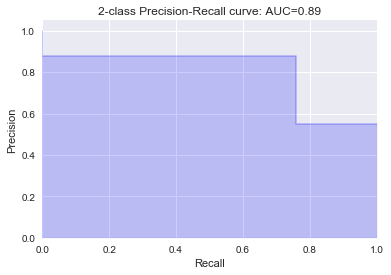

In [31]:
#decision tree classifier
DT = DecisionTreeClassifier(random_state=12)
model_dt = DT.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
Metrics(ytest,pred_dt)
#print('******decision tree*****')
#print('accuray:', accuracy_score(ytest,pred_dt),',recall score:',recall_score(ytest,pred_dt))
#print(confusion_matrix(ytest,pred_dt))
#print(model_dt.feature_importances_ )


In [28]:
roc_auc_score(ytest,pred_dt)

0.81681034482758619

accuray: 0.830188679245 ,recall score: 0.827586206897 
 ConfusionMatrix: 
 [[20  4]
 [ 5 24]]
average_precision_score:  0.88953434334
Precision Score: 0.857142857143 F1_score: 0.842105263158


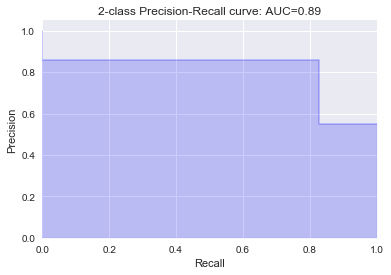

In [32]:
#random forest 
#rf = RandomForestClassifier(max_depth = 2,random_state=1)
rf = RandomForestClassifier(n_estimators=25, min_samples_split=25, \
                            max_depth=5,random_state=72)
model_rf = rf.fit(xtrain,ytrain)
pred_rf = model_rf.predict(xtest)
Metrics(ytest,pred_rf)
#print('******random forest*****')
#print('accuray:', accuracy_score(ytest,pred_rf),',recall score:',recall_score(ytest,pred_rf))
#print(confusion_matrix(ytest,pred_rf))
#print(model_rf.feature_importances_)
#print('Precision Score:',precision_score(ytest,pred_rf),'F1_score:',f1_score(ytest,pred_rf))

accuray: 0.77358490566 ,recall score: 0.586206896552 
 ConfusionMatrix: 
 [[24  0]
 [12 17]]
average_precision_score:  0.906310995446
Precision Score: 0.857142857143 F1_score: 0.842105263158


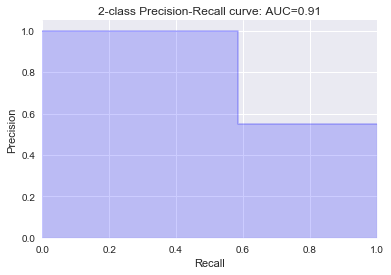

In [34]:
#gaussian naive bayes
gnb = GaussianNB()
modelgnb = gnb.fit(xtrain,ytrain)
pred_gnb = modelgnb.predict(xtest)
Metrics(ytest,pred_gnb)


accuray: 0.660377358491 ,recall score: 0.379310344828 
 ConfusionMatrix: 
 [[24  0]
 [18 11]]
average_precision_score:  0.859466493169
Precision Score: 0.857142857143 F1_score: 0.842105263158


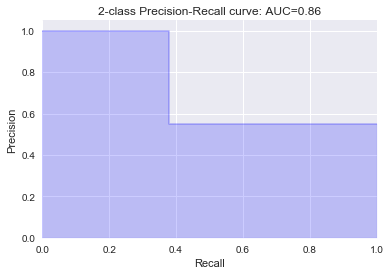

In [35]:
#svm
modelsvc = SVC(kernel='linear')
modelsvc.fit(xtrain,ytrain)
pred_svm = modelsvc.predict(xtest)
Metrics(ytest,pred_svm)

In [42]:
def model_comparison(X_train,X_test, y_train,y_test):
    lr = LogisticRegression()
    gnb = GaussianNB()
    svc = LinearSVC(C=1.0)
    rfc = RandomForestClassifier(n_estimators=100)
    
    plt.figure(figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))
    
    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),\
                      (gnb, 'Naive Bayes'),\
                      (svc, 'Support Vector Classification'),\
                      (rfc, 'Random Forest')]:
        clf.fit(X_train, y_train)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)
    
        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s" % (name, ))
    
        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)
    
    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')
    
    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)
    
    plt.tight_layout()
    plt.show()

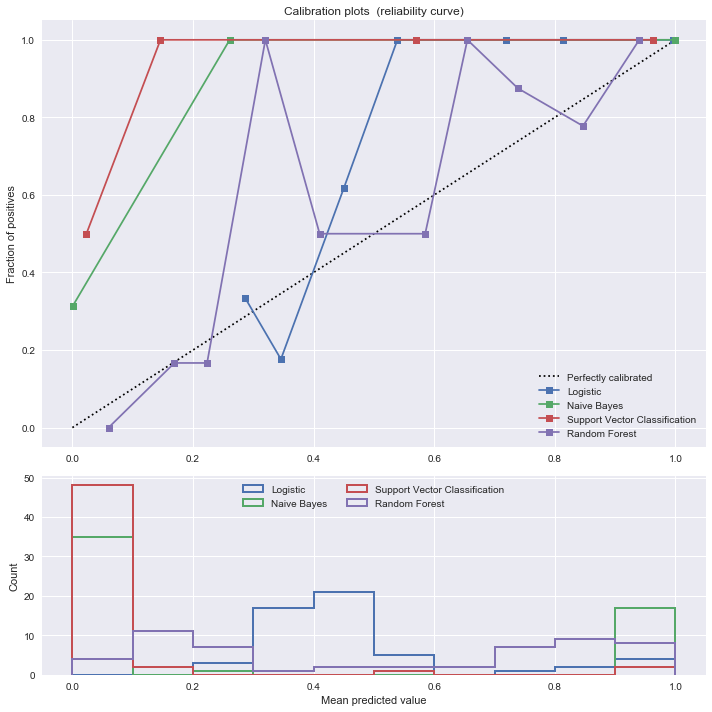

In [43]:
model_comparison(xtrain,xtest,ytrain,ytest)

In [ ]:
#Decision tree and random forest are perhabs giving the best results among all. 
#Although I think models can be improved if provided with more failure data